In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import os
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

plt.style.use("../config/custom_plots.mplstyle")

### Testing the impact of opinion on epidemic layer for different p and beta

```yaml
nAgents: 100000
nSteps: 10000000
nSaveSteps: 10000
nRuns: 1
networkP: 0.8
networkM: 10
additionalLinksFraction: 0.01
virtualLayer: true
epidemicLayer: true
comorbidities: false
qVoterParameters:
  p: 1.0
  q: 6
epidemicLayerParameters:
  beta: 0.1 # beta = 0.1, 0.5, 0.9
  gamma: 0.5
  mu: 0.8
  kappa: 0.2
maxInfectedTimeMean: 10
maxInfectedTimeStd: 5
positiveOpinionFraction: 1.0
infectedFraction: 0.1
fractionIllnessA: 0.0
fractionIllnessB: 0.0
outputFolder: simulations/test_beta_on_virtual_large_m_network_topology
firstParameterRange:
  start: 0.0
  end: 0.4
  count: 11
  vals: null
  type: p
secondParameterRange:
  start: 0.0
  end: 1.0
  count: 3
  vals: [ 0.0, 0.5, 1.0 ]
  type: networkP
linksRemoval: false
nQVoterPerStep: 5
```


If agent has positive opinion he spends less time in infected state (increment by 2). Moreoever, it has a probability to get infected cut in half (beta_new = beta / 2).

In [4]:
def load_df(p, beta, networkP='0.0', fracPos='1.0'):
    path = f"../simulations/test_beta_on_virtual_large_m_network_topology/_NAGENTS=100000_NSTEPS=10000000_NETWORKP={networkP}_FRAC_LINKS=0.01_FRAC_POS_OPINION={fracPos}_FRAC_A=0.0_FRAC_B=0.0_FRAC_INFECTED=0.1_QVOTER=p={p}_q=6_EPIDEMIC=beta={beta}_gamma=0.50_mu=0.80_kappa=0.20_I_TIME_MEAN=10.0_I_TIME_STD=5.0_NRUN=0.tsv"
    return pd.read_csv(path, sep="\t")

ps = [f'{x:.2f}' for x in np.linspace(0, 0.4, 11)]
betas = ['0.10', '0.50', '0.90']
networkP = ['0.0', '0.5', '1.0']

df_negative = {}
df_positive = {}
df_random = {}

for beta in betas:
    df_positive[beta] = [load_df(p, beta, '0.0') for p in ps]
    df_random[beta] = [load_df(p, beta, '0.5') for p in ps]
    df_negative[beta] = [load_df(p, beta, '1.0') for p in ps]

In [5]:
# Load data without virtual layer

def load_df2(beta):
    path = f'../simulations/test_beta_on_virtual_large_m_no_qvoter/test_beta_on_virtual_no_qvoter_NAGENTS=100000_NSTEPS=10000000_FRAC_LINKS=0.01_FRAC_POS_OPINION=0.9_FRAC_A=0.0_FRAC_B=0.0_FRAC_INFECTED=0.1_QVOTER=p=1.00_q=6_EPIDEMIC=beta={beta}_gamma=0.50_mu=0.80_kappa=0.20_I_TIME_MEAN=10.0_I_TIME_STD=5.0_NRUN=0.tsv'
    return pd.read_csv(path, sep="\t")

df_beta1 = load_df2(betas[0])
df_beta2 = load_df2(betas[1])
df_beta3 = load_df2(betas[2])

In [8]:
def print_run(dfs, col, beta, ylim, xlim):
    for i, df in enumerate(dfs):
        plt.plot(df.step, df[col], label=fr'$p$={ps[i]}', color=colormap(i))
    plt.title(r'$\beta$={}'.format(beta))
    plt.xlabel("time")
    plt.ylim(*ylim)
    plt.xlim(*xlim)

colormap = plt.cm.get_cmap('viridis', len(ps))


def plot_results(dfs, column, ylabel, ylim=(-0.1, 1.1), xlim=(-0.1, 4*1e6), networkP='1.0'):
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 3, 1)
    print_run(dfs[betas[0]], column, betas[0], ylim, xlim)
    plt.plot(df_beta1.step, df_beta1[column], color="red")
    plt.ylabel(ylabel)

    plt.subplot(1, 3, 2)
    print_run(dfs[betas[1]], column, betas[1], ylim, xlim)
    plt.plot(df_beta2.step, df_beta2[column], color="red")

    plt.subplot(1, 3, 3)
    print_run(dfs[betas[2]], column, betas[2], ylim, xlim)
    plt.plot(df_beta3.step, df_beta3[column], color="red", label="no virtual")
    plt.legend(loc=(1, 0.1))
    
    plt.suptitle(f"Network p = {networkP}", fontsize=25)
    plt.show()

### Susceptible rate

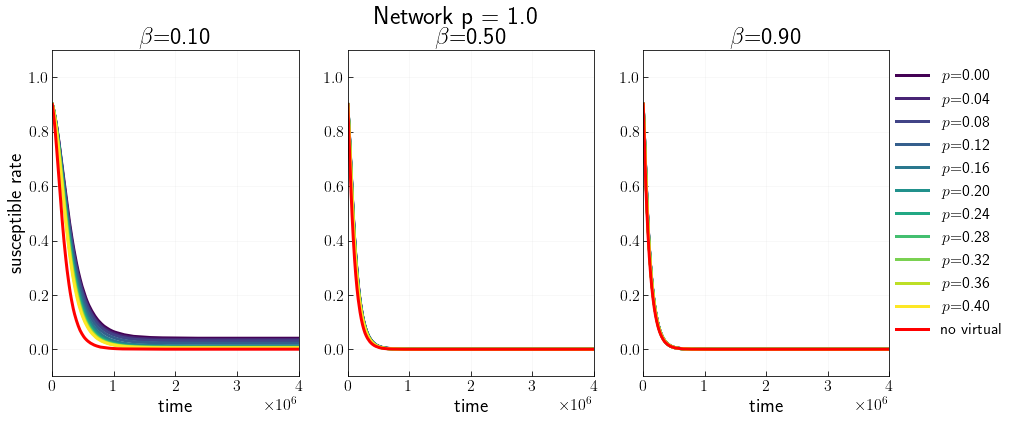

In [10]:
plot_results(df_positive, 'susceptibleRate', 'susceptible rate', networkP='1.0')

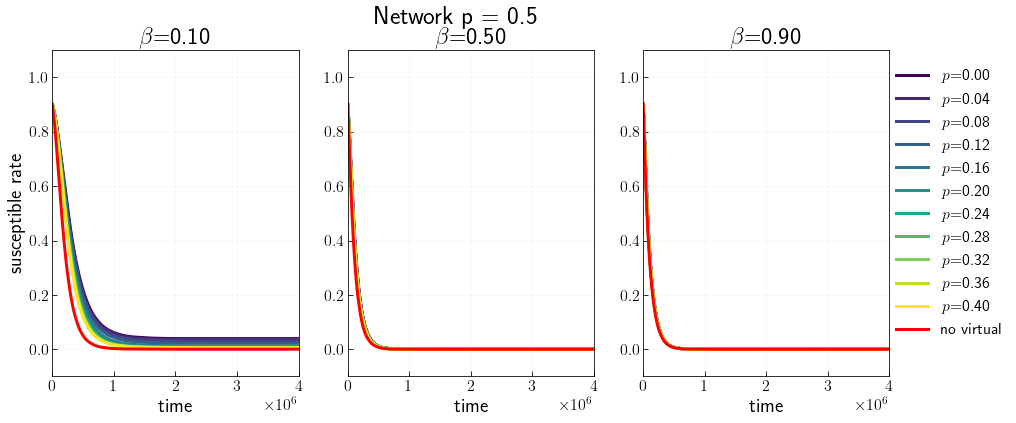

In [11]:
plot_results(df_random, 'susceptibleRate', 'susceptible rate', networkP='0.5')

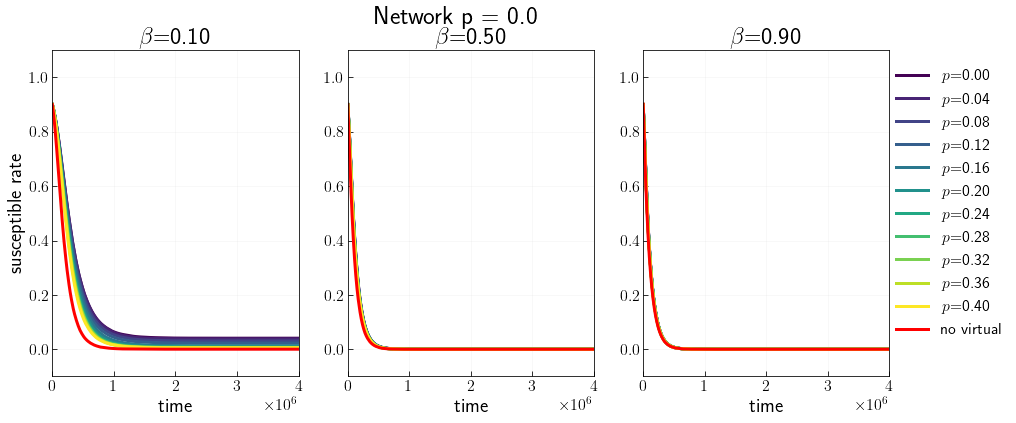

In [12]:
plot_results(df_negative, 'susceptibleRate', 'susceptible rate', networkP='0.0')

### Infected rate

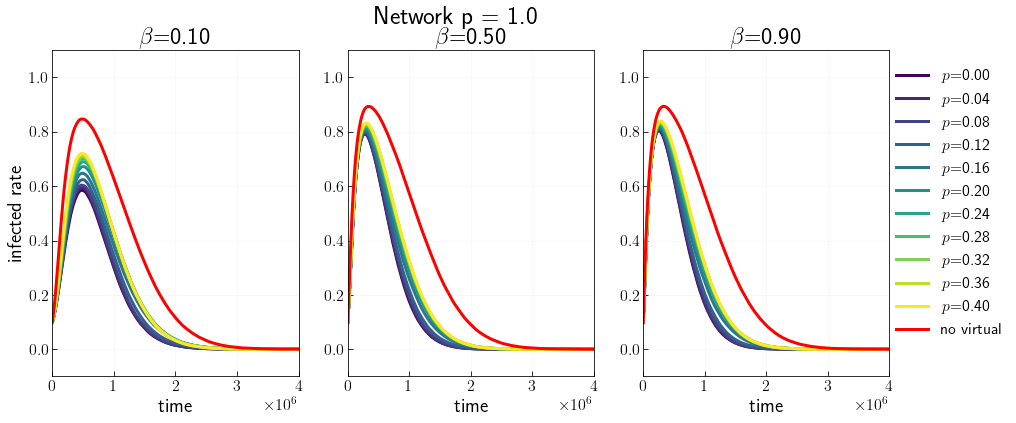

In [13]:
plot_results(df_positive, 'infectedRate', 'infected rate', networkP='1.0')

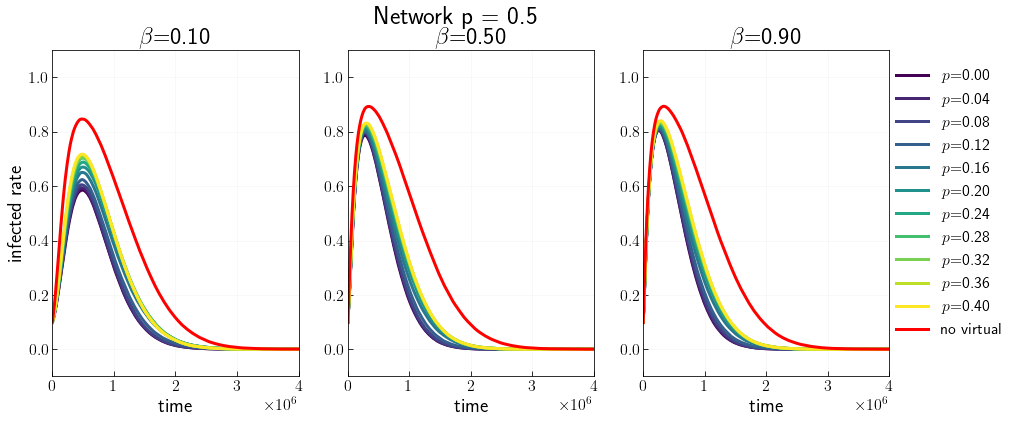

In [14]:
plot_results(df_random, 'infectedRate', 'infected rate', networkP='0.5')

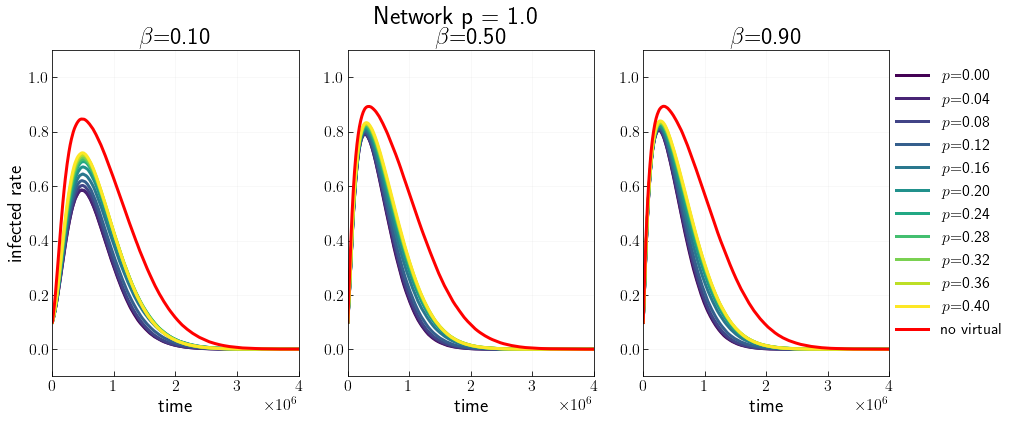

In [15]:
plot_results(df_negative, 'infectedRate', 'infected rate', networkP='1.0')

### Quarantined rate

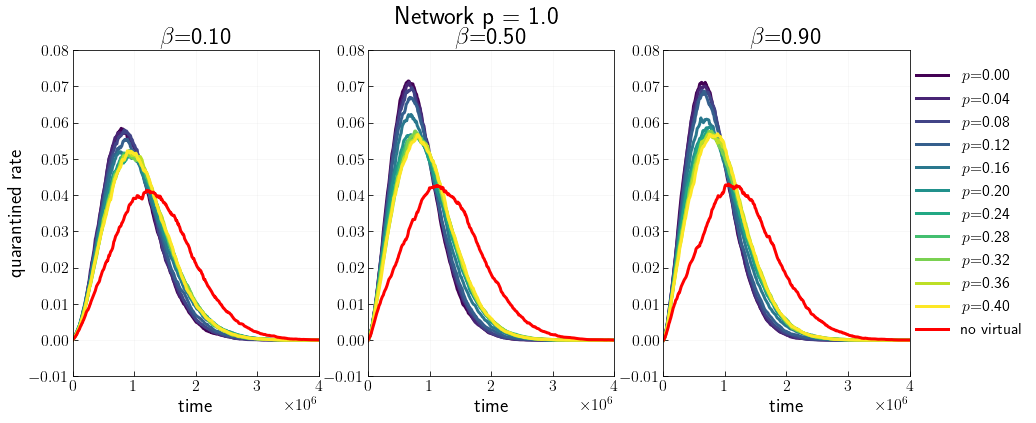

In [16]:
plot_results(df_positive, 'quarantinedRate', 'quarantined rate', ylim=(-0.01, 0.08), networkP='1.0')

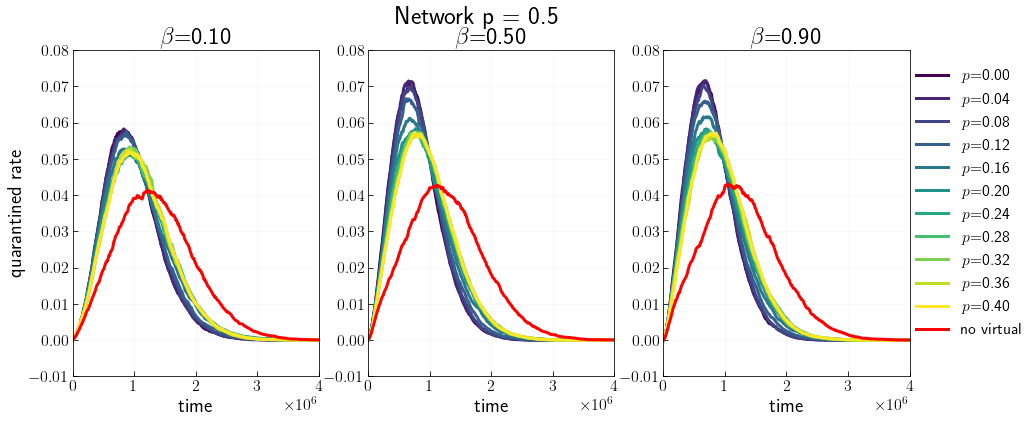

In [17]:
plot_results(df_random, 'quarantinedRate', 'quarantined rate', ylim=(-0.01, 0.08), networkP='0.5')

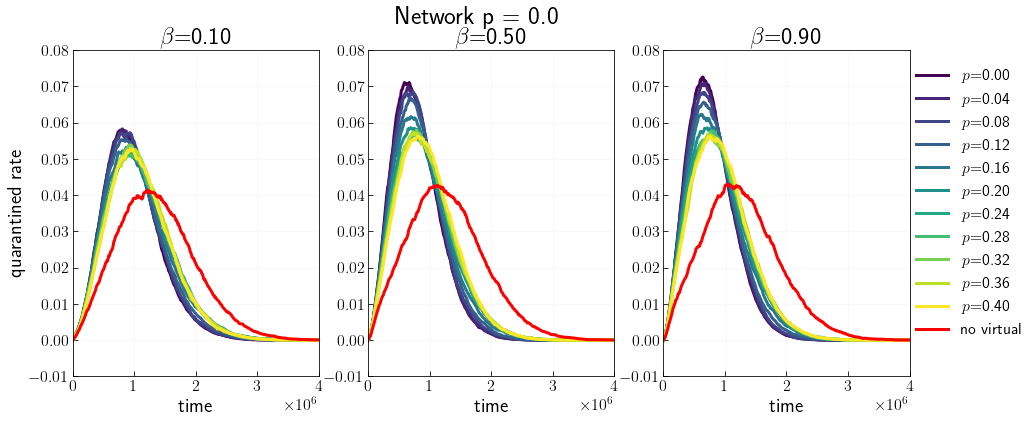

In [18]:
plot_results(df_negative, 'quarantinedRate', 'quarantined rate', ylim=(-0.01, 0.08), networkP='0.0')

### Recovered rate

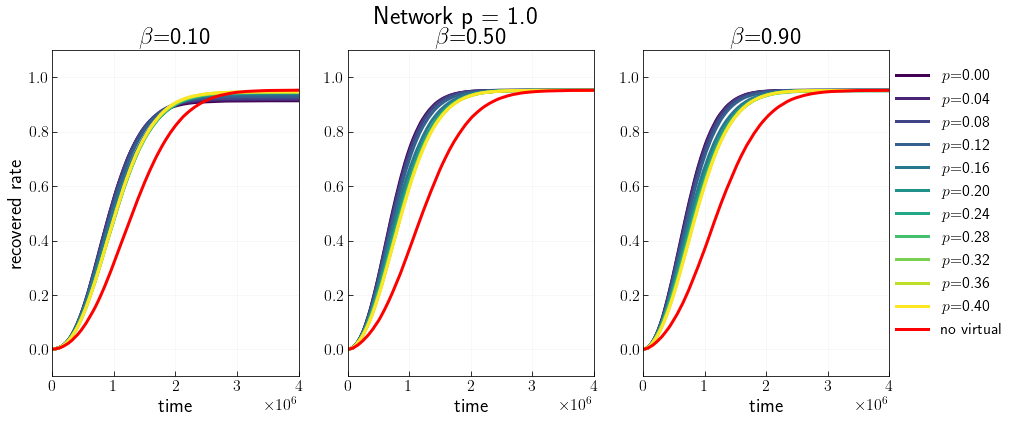

In [19]:
plot_results(df_positive, 'recoveredRate', 'recovered rate', networkP='1.0')

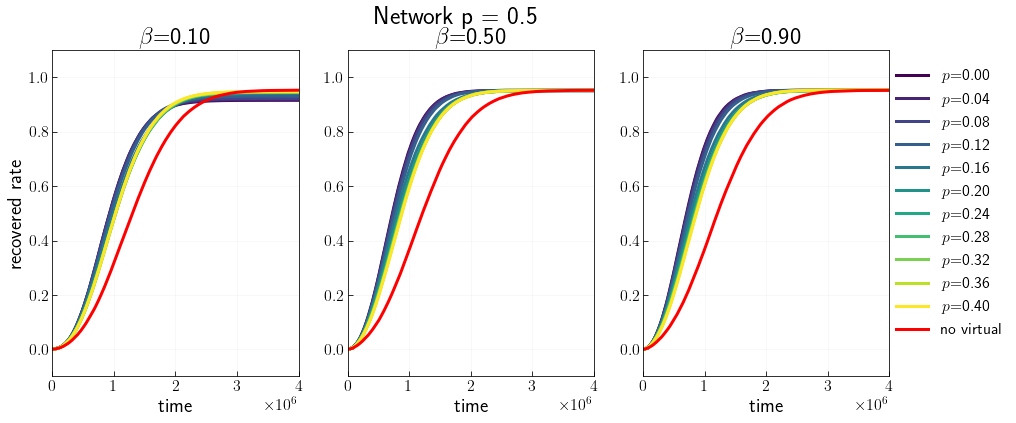

In [20]:
plot_results(df_random, 'recoveredRate', 'recovered rate', networkP='0.5')

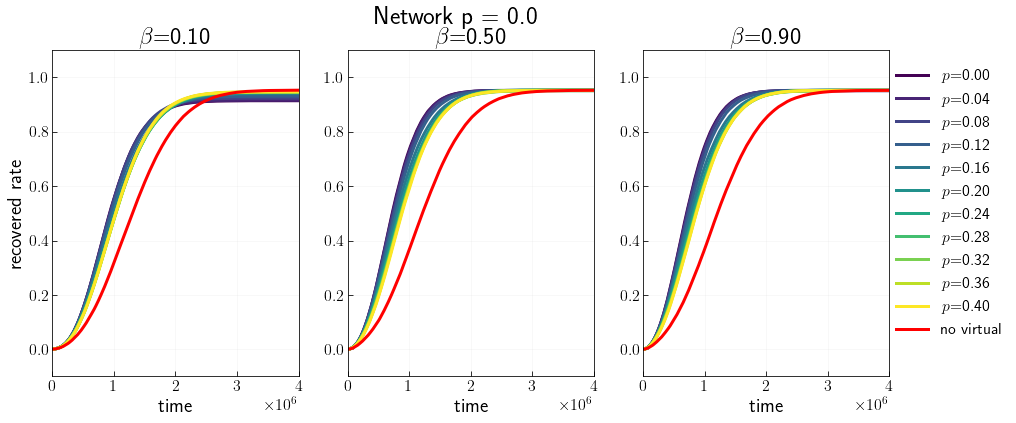

In [21]:
plot_results(df_negative, 'recoveredRate', 'recovered rate', networkP='0.0')

### Dead rate

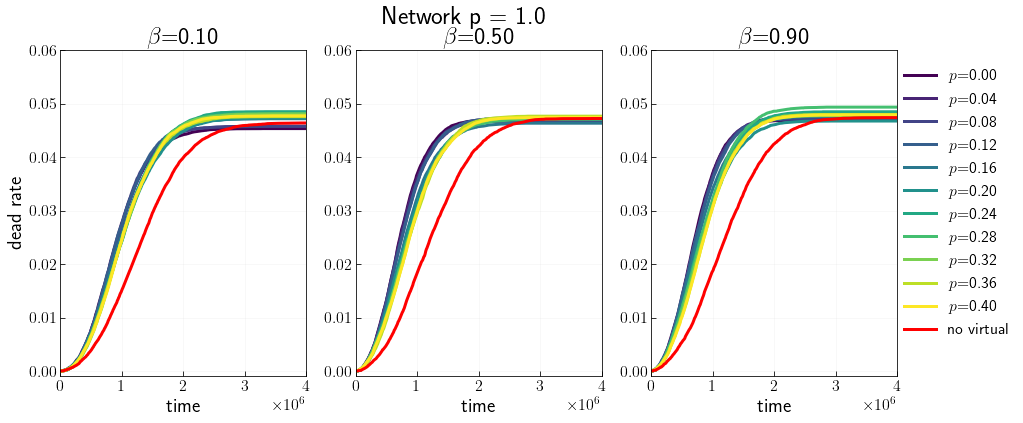

In [22]:
plot_results(df_positive, 'deadRate', 'dead rate', ylim=(-0.001, 0.06), networkP='1.0')

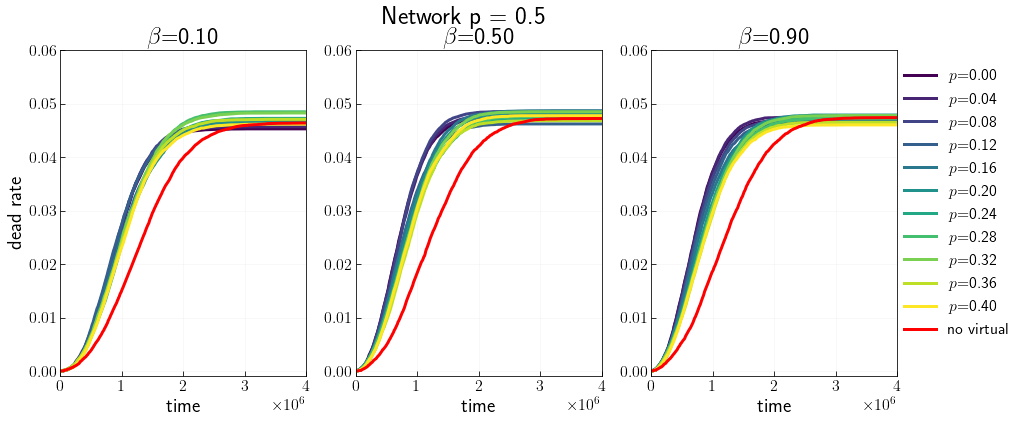

In [23]:
plot_results(df_random, 'deadRate', 'dead rate', ylim=(-0.001, 0.06), networkP='0.5')

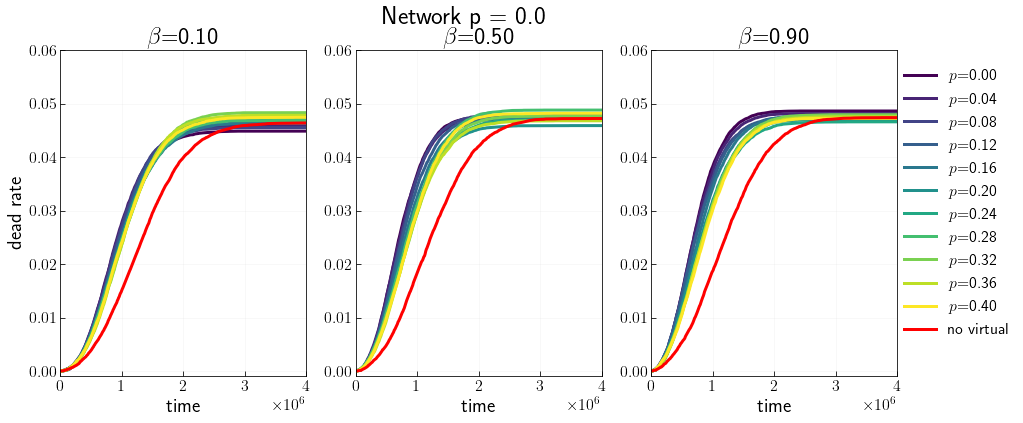

In [24]:
plot_results(df_negative, 'deadRate', 'dead rate', ylim=(-0.001, 0.06), networkP='0.0')

### Mean opinion

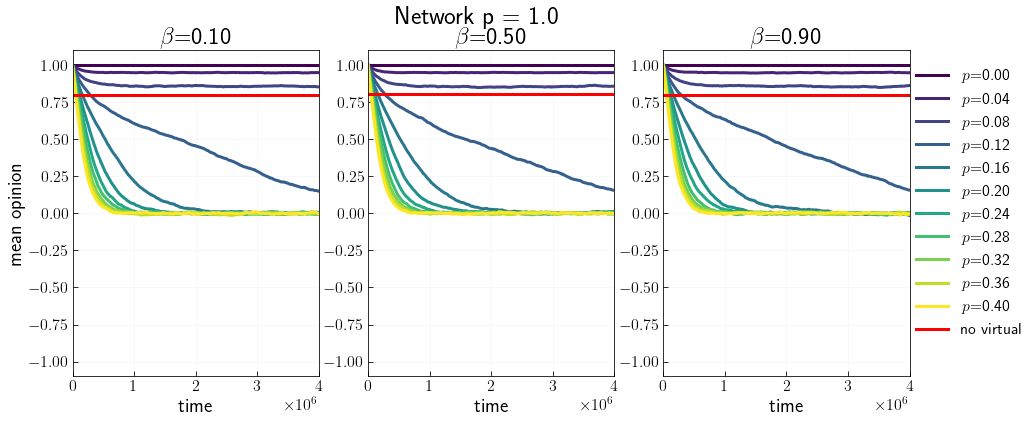

In [25]:
plot_results(df_positive, 'meanOpinion', 'mean opinion', ylim=(-1.1, 1.1), networkP='1.0')

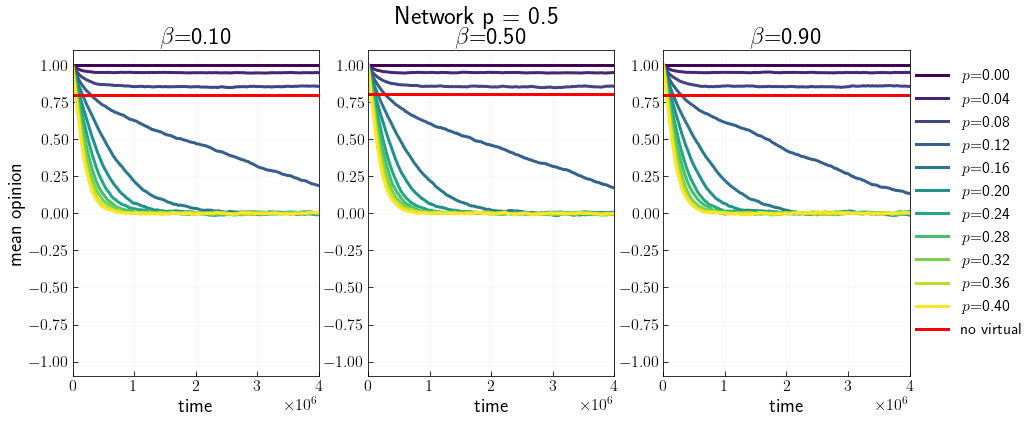

In [26]:
plot_results(df_random, 'meanOpinion', 'mean opinion', ylim=(-1.1, 1.1), networkP='0.5')

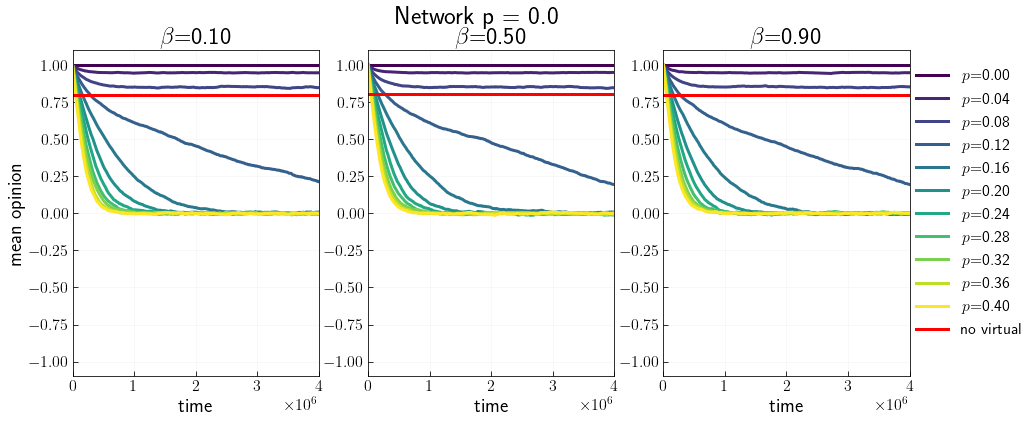

In [27]:
plot_results(df_negative, 'meanOpinion', 'mean opinion', ylim=(-1.1, 1.1), networkP='0.0')